## Import library

In [41]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

## Dataset

### Load cifar10

In [42]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data() #載入cifar到程式中

In [43]:
print("train data:",'images:',x_train.shape,
      " labels:",y_train.shape)
print("test  data:",'images:',x_test.shape ,
      " labels:",y_test.shape)

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


### Normalize

In [44]:
#把0-255的像素轉換到0-1之間
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [45]:
x_train_norm.shape

(50000, 32, 32, 3)

### One hot encode

In [46]:
#進行One hot encode 作為label
y_train_OneHot = to_categorical(y_train)
y_test_OneHot = to_categorical(y_test)

## Model

In [47]:
#建立模型: MPL(Multilayer perceptron, 多層感知器) 神經網路
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)), #將32*32*3的圖片壓成3072*1的向量
  tf.keras.layers.Dense(512, activation='relu'), #全連接層(3072 -> 512)，使用relu做激勵函數
  tf.keras.layers.Dense(256, activation='relu'), #全連接層(512 -> 256)，使用relu做激勵函數
  tf.keras.layers.Dense(128, activation='relu'), #全連接層(256 -> 128)，使用relu做激勵函數
  tf.keras.layers.Dropout(0.2), #20% Dropout (20%的節點隨機輸出歸零)
  tf.keras.layers.Dense(10, activation='softmax') #全連接層輸出 (十類分類指數)，使用softmax做激勵函數
])

In [65]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               1573376   
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
No

### Load weight



In [ ]:
try:
    model.load_weights("./cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :
    print("載入模型失敗!開始訓練一個新模型")

## Training


In [48]:
model.compile(optimizer='adam',  #用 adam 優化器
              loss='categorical_crossentropy', #指定損失函式
              metrics=['accuracy']) #評估指標用「正確度(答對的比率)」

In [49]:
train_history = model.fit(x_train_norm, y_train_OneHot,
                          validation_split=0.2, #20%的測試資料拿去當驗證集
                          epochs=10, #訓練：10 epochs (訓練資料跑完十次)
                          batch_size=128, #一次讀進的資料量
                          verbose=1) #進度條

Epoch 1/10
313/313 [==============================] - 15s 47ms/step - loss: 1.9918 - accuracy: 0.2698 - val_loss: 1.8457 - val_accuracy: 0.3420
Epoch 2/10
313/313 [==============================] - 15s 48ms/step - loss: 1.7890 - accuracy: 0.3609 - val_loss: 1.7224 - val_accuracy: 0.3798
Epoch 3/10
313/313 [==============================] - 14s 45ms/step - loss: 1.6994 - accuracy: 0.3921 - val_loss: 1.6963 - val_accuracy: 0.3919
Epoch 4/10
313/313 [==============================] - 15s 46ms/step - loss: 1.6371 - accuracy: 0.4166 - val_loss: 1.6065 - val_accuracy: 0.4282
Epoch 5/10
313/313 [==============================] - 17s 54ms/step - loss: 1.5794 - accuracy: 0.4383 - val_loss: 1.5650 - val_accuracy: 0.4375
Epoch 6/10
313/313 [==============================] - 14s 44ms/step - loss: 1.5414 - accuracy: 0.4524 - val_loss: 1.5477 - val_accuracy: 0.4522
Epoch 7/10
313/313 [==============================] - 14s 45ms/step - loss: 1.5023 - accuracy: 0.4645 - val_loss: 1.5111 - val_accuracy:

### Accuracy

In [50]:
def show_acc_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

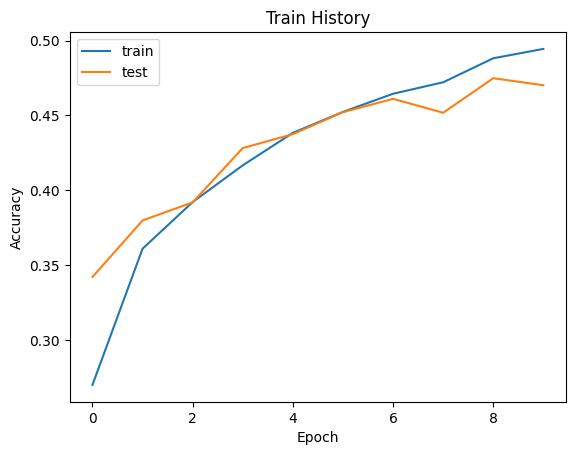

In [51]:
show_acc_train_history('accuracy','val_accuracy')

### Loss

In [52]:
def show_loss_train_history(train_loss,test_loss):
    plt.plot(train_history.history[train_loss])
    plt.plot(train_history.history[test_loss])
    plt.title('Train History')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

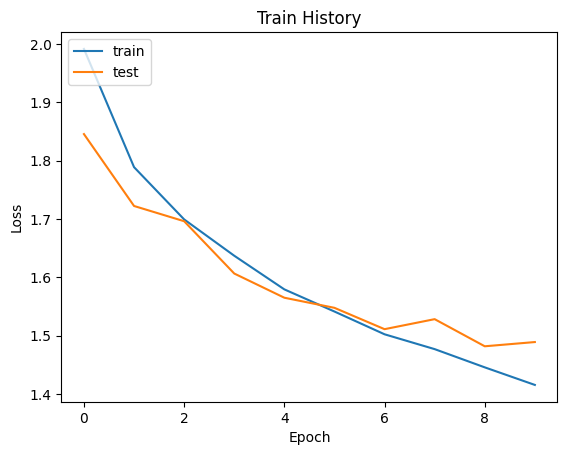

In [53]:
show_loss_train_history('loss','val_loss')

## Test

In [56]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

### On test set

In [54]:
loss, acc = model.evaluate(x_test_norm,  y_test_OneHot, verbose=0) #評估測試組的平均損失與正確率
print("Loss:", loss)
print("Accuracy", acc)

Loss: 1.4747340679168701
Accuracy 0.4740999937057495


In [55]:
prediction=np.argmax(model.predict(x_test_norm), axis=-1)
prediction[:10]

313/313 [==============================] - 2s 7ms/step


array([5, 1, 0, 0, 4, 6, 3, 6, 2, 1])

### Have a glance

In [57]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')

        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]

        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

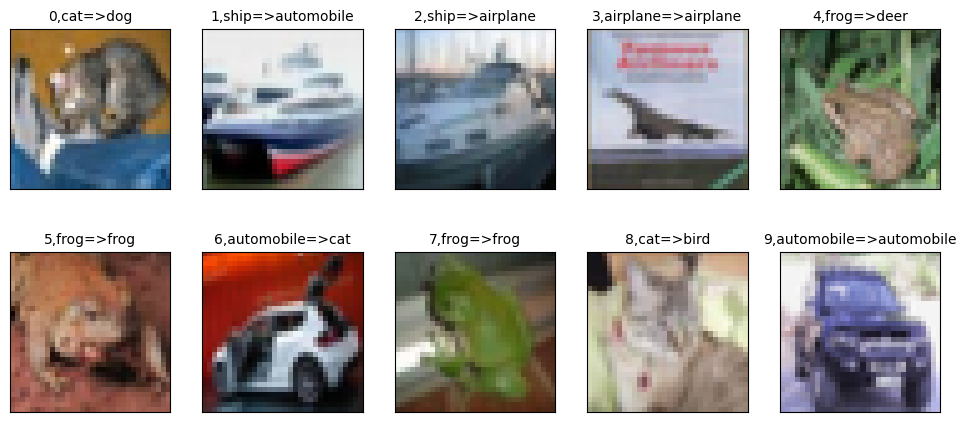

In [58]:
plot_images_labels_prediction(x_test_norm, y_test,
                              prediction,0,10)

In [59]:
Predicted_Probability=model.predict(x_test_norm)

313/313 [==============================] - 2s 6ms/step


### Single image

In [60]:
def show_Predicted_Probability(y,prediction,
                               x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],
          'predict:',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_test_norm[i],(32, 32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+
              ' Probability:%1.9f'%(Predicted_Probability[i][j]))

label: cat predict: dog


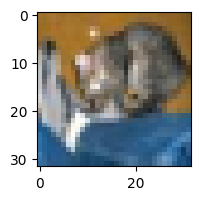

airplane Probability:0.013954024
automobile Probability:0.041298635
bird Probability:0.066706434
cat Probability:0.300847024
deer Probability:0.097166255
dog Probability:0.313211024
frog Probability:0.067172214
horse Probability:0.022292662
ship Probability:0.061094340
truck Probability:0.016257435


In [61]:
show_Predicted_Probability(y_test,prediction,
                           x_test_norm,Predicted_Probability,0)

### Confusion matrix

In [63]:
import pandas as pd
print(label_dict)
pd.crosstab(y_test.reshape(-1),prediction,
            rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,588,77,46,22,14,11,42,12,153,35
1,34,738,5,23,6,16,24,11,52,91
2,118,53,261,92,113,63,224,30,33,13
3,44,43,63,312,30,174,222,19,37,56
4,83,30,105,65,337,38,263,31,39,9
5,37,27,76,202,41,347,164,37,45,24
6,12,33,31,63,74,40,702,6,19,20
7,84,55,66,87,76,68,95,384,25,60
8,131,116,12,29,12,20,17,5,626,32


## Save weight

In [64]:
model.save_weights("./cifarCnnModel.h5")